C:\Users\sksan\AppData\Local\Temp\ipykernel_13468\1434883528.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dates'] = pd.to_datetime(data['Dates'])
C:\Users\sksan\AppData\Local\Temp\ipykernel_13468\1434883528.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_dates = [data['Dates'].min() + timedelta(days=int(d)) for d in future_days]


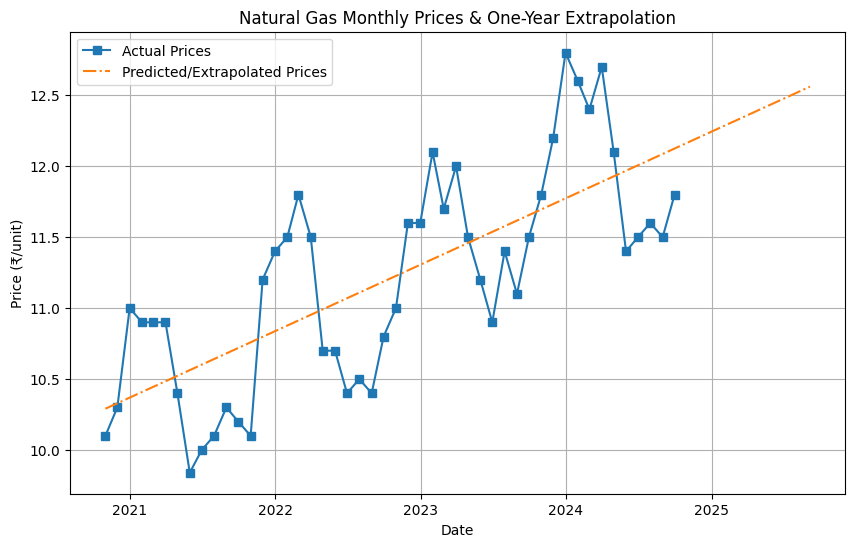

Estimated price on 2025-09-30: 12.59


In [11]:
'''After asking around for the source of the existing data, 
you learn that the current process is to take a monthly snapshot of prices from a market data provider,
which represents the market price of natural gas delivered at the end of each calendar month. 
This data is available for roughly the next 18 months and is combined with historical prices in a time series database. 
After gaining access, you are able to download the data in a CSV file. 
You should use this monthly snapshot to produce a varying picture of the existing price data, as well as an extrapolation for an extra year, in case the client needs an indicative price for a longer-term storage contract.
Download the monthly natural gas price data. Each point in the data set corresponds to the purchase price of natural gas at the end of a month, from 31st October 2020 to 30th September 2024. Analyze the data to estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future. Your code should take a date as input and return a price estimate. 
Try to visualize the data to find patterns and consider what factors might cause the price of natural gas to vary. This can include looking at months 
of the year for seasonal trends that affect the prices, but market holidays, weekends, and bank holidays need not be accounted for. Submit your 
completed code below. Note: This role often requires the knowledge and utilization of data analysis and machine learning. Python is a useful tool
and one that JPMorgan Chase uses a lot in quantitative research since it’s capable of completing complex tasks. Moving forward in this program, 
the example answers are given in Python code. (If Python is not downloaded on your system, 
you can execute Python code in Jupyter Notebook online for free.)'''




#  Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.linear_model import LinearRegression

#  Load the CSV file
file_path = "Nat_Gas.csv"   # <-- keep this file in same folder or give full path
data = pd.read_csv(r"C:\Users\sksan\Downloads\Nat_Gas.csv")


#   Clean & prepare data
data['Dates'] = pd.to_datetime(data['Dates'])
data = data.sort_values('Dates')
data['Days'] = (data['Dates'] - data['Dates'].min()).dt.days

#  Train linear regression model
model = LinearRegression()
X = data['Days'].values.reshape(-1, 1)
y = data['Prices'].values
model.fit(X, y)

#   Predict future prices (for next 1 year)
future_days = np.arange(0, data['Days'].max() + 365, 30).reshape(-1, 1)
future_dates = [data['Dates'].min() + timedelta(days=int(d)) for d in future_days]
predicted_prices = model.predict(future_days)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Prices'], label='Actual Prices', marker='s')
plt.plot(future_dates, predicted_prices, label='Predicted/Extrapolated Prices', linestyle='-.')
plt.title("Natural Gas Monthly Prices & One-Year Extrapolation")
plt.xlabel("Date")
plt.ylabel("Price (₹/unit)")
plt.legend()
plt.grid(True)
plt.show()

#  Function to estimate price for any date
def estimate_price(date_str):
    """Estimate natural gas price for any date"""
    date = pd.to_datetime(date_str)
    days_from_start = (date - data['Dates'].min()).days
    price = model.predict(np.array([[days_from_start]]))[0]
    return round(price, 2)


example_date = "2025-09-30"
print(f"Estimated price on {example_date}: {estimate_price(example_date)}")
